In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from ipywidgets import interact
import numpy as np

In [18]:
#!pip install librosa
import librosa
import librosa.display

# Music sound files, spectral analysis of those files, coversion of the WAV files into PNG image files.

# --------------------------------------------------------------------------------------------------
# https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification
# --------------------------------------------------------------------------------------------------

# This file is not included in my presentation.  I will do additional analysis on this file in the future

In [19]:
genre_df = pd.read_csv("data/features_30_sec.csv")

In [20]:
genre_df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [21]:
genre_df.isna().mean()

filename                   0.0
length                     0.0
chroma_stft_mean           0.0
chroma_stft_var            0.0
rms_mean                   0.0
rms_var                    0.0
spectral_centroid_mean     0.0
spectral_centroid_var      0.0
spectral_bandwidth_mean    0.0
spectral_bandwidth_var     0.0
rolloff_mean               0.0
rolloff_var                0.0
zero_crossing_rate_mean    0.0
zero_crossing_rate_var     0.0
harmony_mean               0.0
harmony_var                0.0
perceptr_mean              0.0
perceptr_var               0.0
tempo                      0.0
mfcc1_mean                 0.0
mfcc1_var                  0.0
mfcc2_mean                 0.0
mfcc2_var                  0.0
mfcc3_mean                 0.0
mfcc3_var                  0.0
mfcc4_mean                 0.0
mfcc4_var                  0.0
mfcc5_mean                 0.0
mfcc5_var                  0.0
mfcc6_mean                 0.0
mfcc6_var                  0.0
mfcc7_mean                 0.0
mfcc7_va

In [22]:
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [23]:
genre_df.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [27]:
genre_list = [
    "pop",
    "rock",
    "hip hop",
    "blues",
    "metal",
    "country",
    "disco",
    "jazz",
    "classical",
]

In [28]:
nums_gen = genre_df.select_dtypes("number")

@interact
def boxplot(y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.box(
        x="label",
        y=y,
        color=hue,
        data_frame=genre_df,
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
            "cluster": "Cluster",
        },
    )
    fig.show()

interactive(children=(Dropdown(description='y', options=('length', 'chroma_stft_mean', 'chroma_stft_var', 'rms…

In [29]:
@interact
def scatterplot(x=nums_gen.columns, y=nums_gen.columns, hue=["label"]):
    plt.figure(figsize=(15, 8))
    fig = px.scatter(
        x=x,
        y=y,
        color=hue,
        data_frame=genre_df,
        labels={
            "spotify_track_duration_ms": "Track length (seconds)",
            "danceability": "Danceability",
            "genre_label": "Genre",
            "speechiness": "Speechiness",
            "energy": "Energy",
            "spotify_track_popularity": "Popularity",
            "cluster": "Cluster",
        },
    )
    fig.show()

interactive(children=(Dropdown(description='x', options=('length', 'chroma_stft_mean', 'chroma_stft_var', 'rms…

In [40]:
S_dB

array([[-34.9475  , -34.36591 , -34.448307, ..., -41.171585, -46.361507,
        -39.63845 ],
       [-28.995617, -29.436577, -27.2674  , ..., -26.200104, -28.345005,
        -29.192171],
       [-23.467916, -22.781433, -21.27737 , ..., -24.252626, -26.439783,
        -26.795029],
       ...,
       [-60.469322, -60.256798, -62.5654  , ..., -62.47077 , -62.24971 ,
        -65.17687 ],
       [-63.003242, -64.21199 , -65.70008 , ..., -61.90422 , -61.77112 ,
        -64.34734 ],
       [-61.68431 , -64.37079 , -65.70702 , ..., -64.09853 , -64.514885,
        -66.93337 ]], dtype=float32)

# Spectral analysis

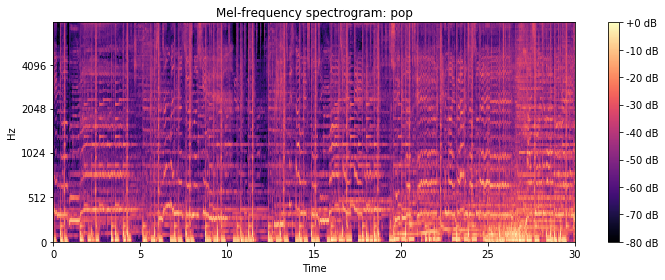

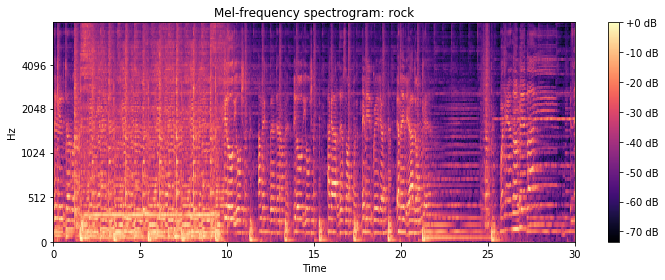

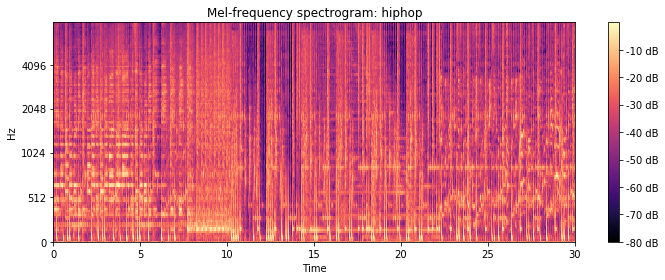

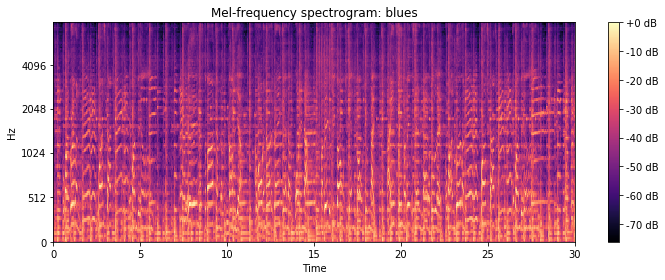

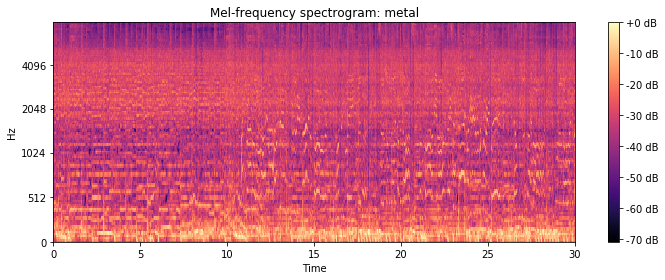

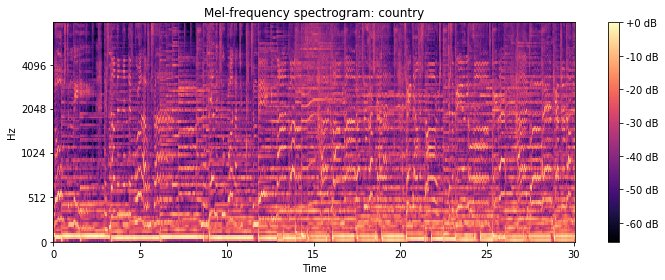

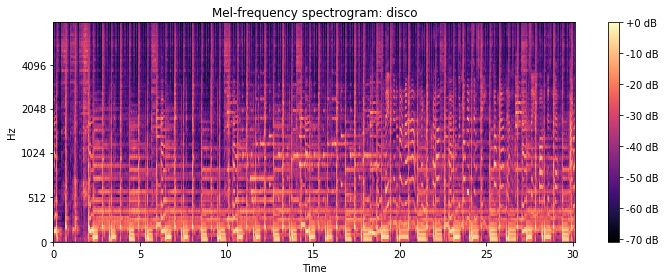

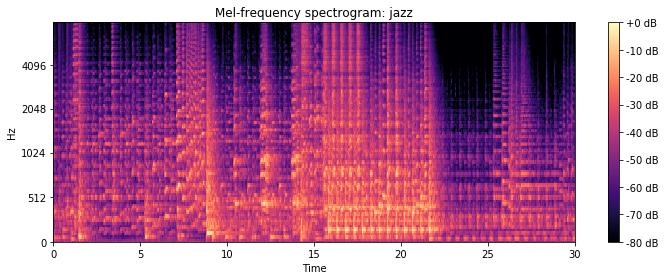

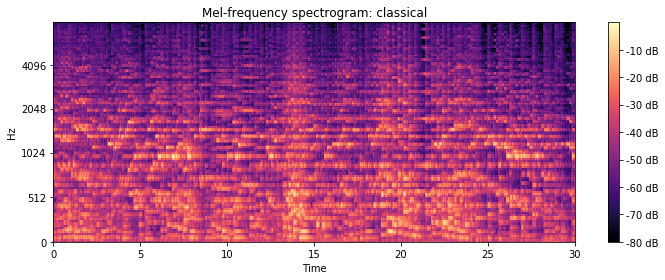

In [32]:
for genre in genre_list:
    genre = genre.replace(" ", "")
    y, sr = librosa.load(
        "data/genres_original/{genre}/{genre}.00000.wav".format(genre=genre)
    )
    librosa.feature.melspectrogram(y=y, sr=sr)

    D = np.abs(librosa.stft(y)) ** 2
    S = librosa.feature.melspectrogram(S=D, sr=sr)

    # Passing through arguments to the Mel filters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

    plt.figure(figsize=(10, 4))
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sr, fmax=8000)
    plt.colorbar(format="%+2.0f dB")
    plt.title("Mel-frequency spectrogram: " + genre)
    plt.tight_layout()
    plt.show()